In [1]:
# Import data and perform processing 
import os as os 

In [2]:
# import the relevent package
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier   # we are applying the boosting techinque
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Setting the working directory

In [3]:
os.chdir('C:\\Users\\MyPC\\Desktop\\Capstone Project\\HR Analytics')

In [4]:
os.getcwd()

'C:\\Users\\MyPC\\Desktop\\Capstone Project\\HR Analytics'

In [5]:
os.listdir()

['DataDictionary-HR Analytics.xlsx',
 'HR Analytics.pdf',
 'staff utlz latest 16-17_masked.xlsx',
 'staff utlz latest 17-18_masked.xlsx',
 'Terminations 15-18.xlsx']

In [6]:
import xlrd
# read the dataset
df = pd.read_excel('staff utlz latest 16-17_masked.xlsx')

df1 = pd.read_excel('staff utlz latest 17-18_masked.xlsx')

df2 = pd.read_excel('Terminations 15-18.xlsx')

In [7]:
# check the dimension of the datset
print("Dimension of the df data",df.shape)
print("Dimension of the df1 data",df1.shape)
print("Dimension of the df1 data",df2.shape)

Dimension of the df data (789, 115)
Dimension of the df1 data (973, 115)
Dimension of the df1 data (293, 9)


In [8]:
import warnings
warnings.filterwarnings('ignore')

# Concatinating dataset

In [9]:
alldat = df.append(df1) 

# here we are concatinating df and df1 dataset using .append method

In [10]:
alldata = alldat.append(df2)

# here we are concatinating alldat and df2 dataset using .append method

In [11]:
alldata.head()

# We are joining the two dataset because if there is any imputation to be carried out, we will do it once on the 
# combine dataset we will not have to repeat the entire process once again for the dataset

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,...,NC Hours-Mar-18,Utilization%-Mar-18,Employee Number,YEAR of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating,Emp Ref.
0,1.0,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,2.0,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,1999-05-31,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,3.0,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,2001-01-31,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,4.0,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,5.0,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1998-06-30,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [12]:
alldata.shape

(2055, 219)

# Checking datatype

In [13]:
alldata.dtypes

Employee No                        float64
Profit Center                       object
Employee Name                       object
Employee Position                   object
Employee Location                   object
                                 ...      
Leaving Reason                      object
Previous Employer                   object
Last Update Date            datetime64[ns]
Latest  Available Rating           float64
Emp Ref.                            object
Length: 219, dtype: object

# Summary Statistic

Here we take a look at the summary of each attributes

In [14]:
 alldata.describe()

,Employee No,Avg Total Hours,Avg Total Available Hours,Avg Work Hours,Avg Leave Hours,Avg Training Hours,Avg BD Hours,Avg NC Hours,Employee Number,YEAR of Birth,Latest Available Rating
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,293.000000,293.000000,175.000000
mean,502.346765,1650.238365,1436.809132,1084.965897,183.500284,30.521459,69.501135,364.052202,433.174061,1988.511945,2.971429
std,299.542846,643.610294,579.894300,640.804918,164.025275,31.246483,262.206277,388.732284,267.769414,4.224524,0.698344
min,1.000000,0.000000,-40.000000,-42.000000,0.000000,-11.000000,-24.000000,-28.500000,4.000000,1973.000000,1.000000
25%,248.250000,1400.000000,1160.625000,528.000000,97.000000,6.500000,0.000000,80.000000,208.000000,1986.000000,3.000000
50%,497.500000,2080.000000,1747.750000,1209.250000,172.500000,22.500000,0.000000,243.000000,406.000000,1989.000000,3.000000
75%,729.750000,2080.000000,1852.000000,1640.500000,240.000000,44.000000,0.000000,504.000000,631.000000,1991.000000,3.000000
max,1111.000000,2088.000000,2088.000000,2669.000000,2080.000000,169.000000,2015.000000,2458.500000,1095.000000,1996.000000,5.000000


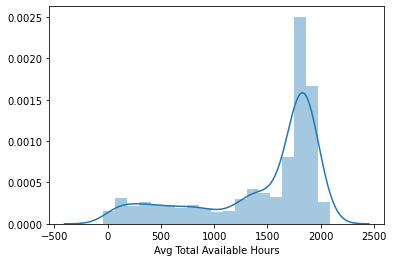

In [15]:
import seaborn as sns

sns.distplot(alldata['Avg Total Available Hours'])

plt.show()  # distribution of Avg Total Available Hours

# showing left skewed in this between 1500 and 2000 Avg Total Available Hours very high

# Examine the numerical features in the dataset

In [16]:
df_numeric_features = alldata.select_dtypes(include=[np.number])

df_numeric_features.columns

# here we are creating an object to have all the numeric features in it.

Index(['Employee No', 'Avg Total Hours', 'Avg Total Available Hours',
       'Avg Work Hours', 'Avg Leave Hours', 'Avg Training Hours',
       'Avg BD Hours', 'Avg NC Hours', 'Employee Number', 'YEAR of Birth',
       'Latest  Available Rating'],
      dtype='object')

In [17]:
df_categorical_features = alldata.select_dtypes(include=[np.object])

df_categorical_features.columns

# In this object have all the categorical features.

Index(['Profit Center', 'Employee Name', 'Employee Position',
       'Employee Location', 'People Group', 'Employee Category',
       'Supervisor name', 'Current Status', 'Termination Date',
       'Total Hours-Apr-16',
       ...
       'Work Hours-Mar-18', 'Leave Hours-Mar-18', 'Training Hours-Mar-18',
       'BD Hours-Mar-18', 'NC Hours-Mar-18', 'Utilization%-Mar-18', 'Gender',
       'Leaving Reason', 'Previous Employer', 'Emp Ref.'],
      dtype='object', length=206)

# Missing values analysis

In [18]:
# check for missing values
missing = alldata.isnull().sum()
missing

Employee No                  293
Profit Center                293
Employee Name                  0
Employee Position            293
Employee Location            293
                            ... 
Leaving Reason              1762
Previous Employer           1834
Last Update Date            1762
Latest  Available Rating    1880
Emp Ref.                    2044
Length: 219, dtype: int64

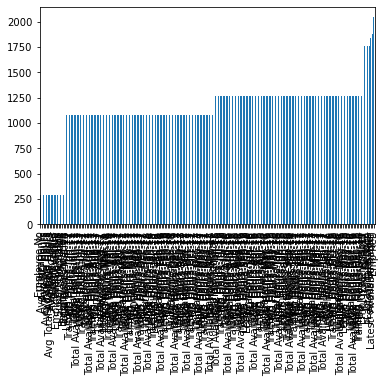

In [19]:
# check for missing values
missing = alldata.isnull().sum()
missing = missing[missing > 0]    # wherever you have missing values greater than 0 it is doing the bar plot.

# We can use bar plot to check missing values
missing.sort_values(inplace=True)
missing.plot.bar()

plt.show()

# A lot of missing values are present in the datasets.

# Missing values features for numerical features

In [20]:
# fill na with median
alldata.fillna(alldata.median(),inplace=True)

# here we are taking the entire dataset and replacing the missing values with median so impact of this line is that, for all
# the categorical variables the imputation could not be carried out. And for all the numerical variables the missing values 
# will be replace with median value.

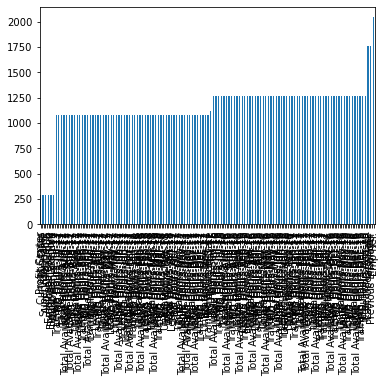

In [21]:
# Again check for missing values
missing = alldata.isnull().sum()
missing = missing[missing > 0]

# We can use bar plot to check missing values
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

# In this plot wherever you see the missing values they are basically your categorical variables.


There is lots of NaN entries.

# Missing values treatment for categorical features

In [22]:
list(df_categorical_features.columns)

['Profit Center',
 'Employee Name',
 'Employee Position',
 'Employee Location',
 'People Group',
 'Employee Category',
 'Supervisor name',
 'Current Status',
 'Termination Date',
 'Total Hours-Apr-16',
 'Total Available Hours-Apr-16',
 'Work Hours-Apr-16',
 'Leave Hours-Apr-16',
 'Training Hours-Apr-16',
 'BD Hours-Apr-16',
 'NC Hours-Apr-16',
 'Utilization%-Apr-16',
 'Total Hours-May-16',
 'Total Available Hours-May-16',
 'Work Hours-May-16',
 'Leave Hours-May-16',
 'Training Hours-May-16',
 'BD Hours-May-16',
 'NC Hours-May-16',
 'Utilization%-May-16',
 'Total Hours-Jun-16',
 'Total Available Hours-Jun-16',
 'Work Hours-Jun-16',
 'Leave Hours-Jun-16',
 'Training Hours-Jun-16',
 'BD Hours-Jun-16',
 'NC Hours-Jun-16',
 'Utilization%-Jun-16',
 'Total Hours-Jul-16',
 'Total Available Hours-Jul-16',
 'Work Hours-Jul-16',
 'Leave Hours-Jul-16',
 'Training Hours-Jul-16',
 'BD Hours-Jul-16',
 'NC Hours-Jul-16',
 'Utilization%-Jul-16',
 'Total Hours-Aug-16',
 'Total Available Hours-Aug-16',
 

In [23]:
# Replace nan with None in these columns
cols_fillna = ['Profit Center','Employee Name','Employee Position','Employee Location','People Group','Employee Category','Supervisor name','Current Status',
 'Termination Date','Total Hours-Apr-16','Total Available Hours-Apr-16','Work Hours-Apr-16','Leave Hours-Apr-16','Training Hours-Apr-16','BD Hours-Apr-16',
 'NC Hours-Apr-16','Utilization%-Apr-16','Total Hours-May-16','Total Available Hours-May-16','Work Hours-May-16','Leave Hours-May-16','Training Hours-May-16',
 'BD Hours-May-16','NC Hours-May-16','Utilization%-May-16','Total Hours-Jun-16','Total Available Hours-Jun-16','Work Hours-Jun-16','Leave Hours-Jun-16',
 'Training Hours-Jun-16','BD Hours-Jun-16','NC Hours-Jun-16','Utilization%-Jun-16','Total Hours-Jul-16','Total Available Hours-Jul-16','Work Hours-Jul-16',
 'Leave Hours-Jul-16','Training Hours-Jul-16','BD Hours-Jul-16','NC Hours-Jul-16','Utilization%-Jul-16','Total Hours-Aug-16','Total Available Hours-Aug-16','Work Hours-Aug-16',
 'Leave Hours-Aug-16','Training Hours-Aug-16','BD Hours-Aug-16','NC Hours-Aug-16','Utilization%-Aug-16','Total Hours-Sep-16','Total Available Hours-Sep-16','Work Hours-Sep-16',
 'Leave Hours-Sep-16','Training Hours-Sep-16','BD Hours-Sep-16','NC Hours-Sep-16','Utilization%-Sep-16','Total Hours-Oct-16','Total Available Hours-Oct-16','Work Hours-Oct-16',
 'Leave Hours-Oct-16','Training Hours-Oct-16','BD Hours-Oct-16','NC Hours-Oct-16','Utilization%-Oct-16','Total Hours-Nov-16','Total Available Hours-Nov-16','Work Hours-Nov-16',
 'Leave Hours-Nov-16','Training Hours-Nov-16','BD Hours-Nov-16','NC Hours-Nov-16','Utilization%-Nov-16','Total Hours-Dec-16','Total Available Hours-Dec-16','Work Hours-Dec-16',
 'Leave Hours-Dec-16','Training Hours-Dec-16','BD Hours-Dec-16','NC Hours-Dec-16','Utilization%-Dec-16','Total Hours-Jan-17','Total Available Hours-Jan-17','Work Hours-Jan-17',
 'Leave Hours-Jan-17','Training Hours-Jan-17','BD Hours-Jan-17','NC Hours-Jan-17','Utilization%-Jan-17','Total Hours-Feb-17','Total Available Hours-Feb-17','Work Hours-Feb-17',
 'Leave Hours-Feb-17','Training Hours-Feb-17','BD Hours-Feb-17','NC Hours-Feb-17','Utilization%-Feb-17','Total Hours-Mar-17','Total Available Hours-Mar-17','Work Hours-Mar-17',
 'Leave Hours-Mar-17','Training Hours-Mar-17','BD Hours-Mar-17','NC Hours-Mar-17','Utilization%-Mar-17','Avg Utilization%','Total Hours-Apr-17','Total Available Hours-Apr-17',
 'Work Hours-Apr-17','Leave Hours-Apr-17','Training Hours-Apr-17','BD Hours-Apr-17','NC Hours-Apr-17','Utilization%-Apr-17','Total Hours-May-17','Total Available Hours-May-17',
 'Work Hours-May-17','Leave Hours-May-17','Training Hours-May-17','BD Hours-May-17','NC Hours-May-17','Utilization%-May-17','Total Hours-Jun-17','Total Available Hours-Jun-17',
 'Work Hours-Jun-17','Leave Hours-Jun-17','Training Hours-Jun-17','BD Hours-Jun-17','NC Hours-Jun-17','Utilization%-Jun-17','Total Hours-Jul-17','Total Available Hours-Jul-17',
 'Work Hours-Jul-17','Leave Hours-Jul-17','Training Hours-Jul-17','BD Hours-Jul-17','NC Hours-Jul-17','Utilization%-Jul-17','Total Hours-Aug-17','Total Available Hours-Aug-17',
 'Work Hours-Aug-17','Leave Hours-Aug-17','Training Hours-Aug-17','BD Hours-Aug-17','NC Hours-Aug-17','Utilization%-Aug-17','Total Hours-Sep-17','Total Available Hours-Sep-17',
 'Work Hours-Sep-17','Leave Hours-Sep-17','Training Hours-Sep-17','BD Hours-Sep-17','NC Hours-Sep-17','Utilization%-Sep-17','Total Hours-Oct-17','Total Available Hours-Oct-17',
 'Work Hours-Oct-17','Leave Hours-Oct-17','Training Hours-Oct-17','BD Hours-Oct-17','NC Hours-Oct-17','Utilization%-Oct-17','Total Hours-Nov-17','Total Available Hours-Nov-17',
 'Work Hours-Nov-17','Leave Hours-Nov-17','Training Hours-Nov-17','BD Hours-Nov-17','NC Hours-Nov-17','Utilization%-Nov-17','Total Hours-Dec-17','Total Available Hours-Dec-17',
 'Work Hours-Dec-17','Leave Hours-Dec-17','Training Hours-Dec-17','BD Hours-Dec-17','NC Hours-Dec-17','Utilization%-Dec-17','Total Hours-Jan-18','Total Available Hours-Jan-18',
 'Work Hours-Jan-18','Leave Hours-Jan-18','Training Hours-Jan-18','BD Hours-Jan-18','NC Hours-Jan-18','Utilization%-Jan-18','Total Hours-Feb-18','Total Available Hours-Feb-18',
 'Work Hours-Feb-18','Leave Hours-Feb-18','Training Hours-Feb-18','BD Hours-Feb-18','NC Hours-Feb-18','Utilization%-Feb-18','Total Hours-Mar-18','Total Available Hours-Mar-18',
 'Work Hours-Mar-18','Leave Hours-Mar-18','Training Hours-Mar-18','BD Hours-Mar-18','NC Hours-Mar-18','Utilization%-Mar-18','Gender','Leaving Reason',
 'Previous Employer','Emp Ref.'] 
for col in cols_fillna:
    alldata[col].fillna('None',inplace=True)
    
# here we are run the for loop cammand for each columns on this cols_fillna object, and we are replacing the missing values
# with None

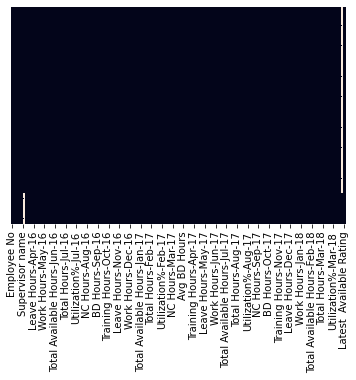

In [24]:
# using heatmap to figure out missing data if any
sns.heatmap(alldata.isnull(),yticklabels=False,cbar=False) 

Supervisor name and Last Update Date has some missing values. 

In [25]:
alldata['Supervisor name'].fillna('None',inplace=True)  # for object

alldata['Last Update Date'].fillna('0',inplace=True)

In [26]:
alldata.isnull().sum()

Employee No                 0
Profit Center               0
Employee Name               0
Employee Position           0
Employee Location           0
                           ..
Leaving Reason              0
Previous Employer           0
Last Update Date            0
Latest  Available Rating    0
Emp Ref.                    0
Length: 219, dtype: int64

# Examine the numerical and categorical features in the dataset after missing value treatment

In [27]:
df_numeric_features.shape

(2055, 11)

In [28]:
df_numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 292
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee No                1762 non-null   float64
 1   Avg Total Hours            1762 non-null   float64
 2   Avg Total Available Hours  1762 non-null   float64
 3   Avg Work Hours             1762 non-null   float64
 4   Avg Leave Hours            1762 non-null   float64
 5   Avg Training Hours         1762 non-null   float64
 6   Avg BD Hours               1762 non-null   float64
 7   Avg NC Hours               1762 non-null   float64
 8   Employee Number            293 non-null    float64
 9   YEAR of Birth              293 non-null    float64
 10  Latest  Available Rating   175 non-null    float64
dtypes: float64(11)
memory usage: 192.7 KB


In [29]:
df_numeric_features.head()

,Employee No,Avg Total Hours,Avg Total Available Hours,Avg Work Hours,Avg Leave Hours,Avg Training Hours,Avg BD Hours,Avg NC Hours,Employee Number,YEAR of Birth,Latest Available Rating
0,1.0,2088.0,1802.0,636.0,216.0,70.0,1192.0,56.0,NaN,NaN,NaN
1,2.0,2088.0,1882.0,555.5,156.0,50.0,694.0,734.0,NaN,NaN,NaN
2,3.0,2088.0,1898.5,1004.5,144.0,45.5,507.0,549.5,NaN,NaN,NaN
3,4.0,2088.0,1851.0,273.0,208.0,29.0,1382.0,255.0,NaN,NaN,NaN
4,5.0,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,NaN,NaN,NaN


# Correlation Matrix

In [30]:
import seaborn as sns

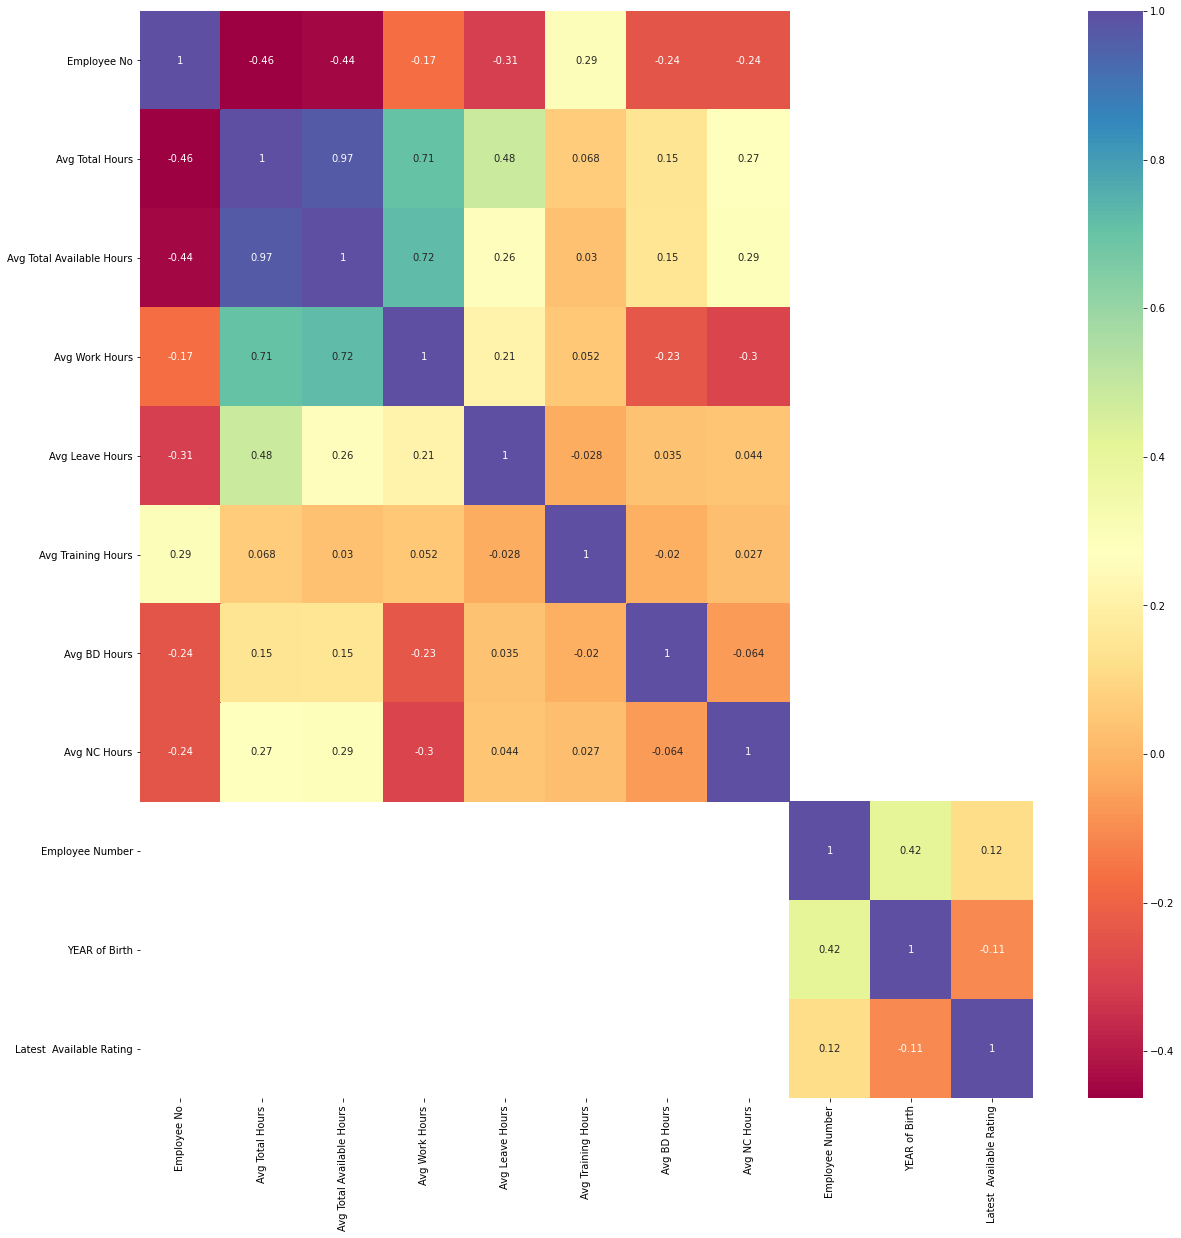

In [31]:
# calculating correlation among numeric variable
corr_matrix = df_numeric_features.corr()

# plot correlation matrix
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix,cmap='Spectral',annot=True);  # if you put annot=False all the cor values will be remove in this plot.

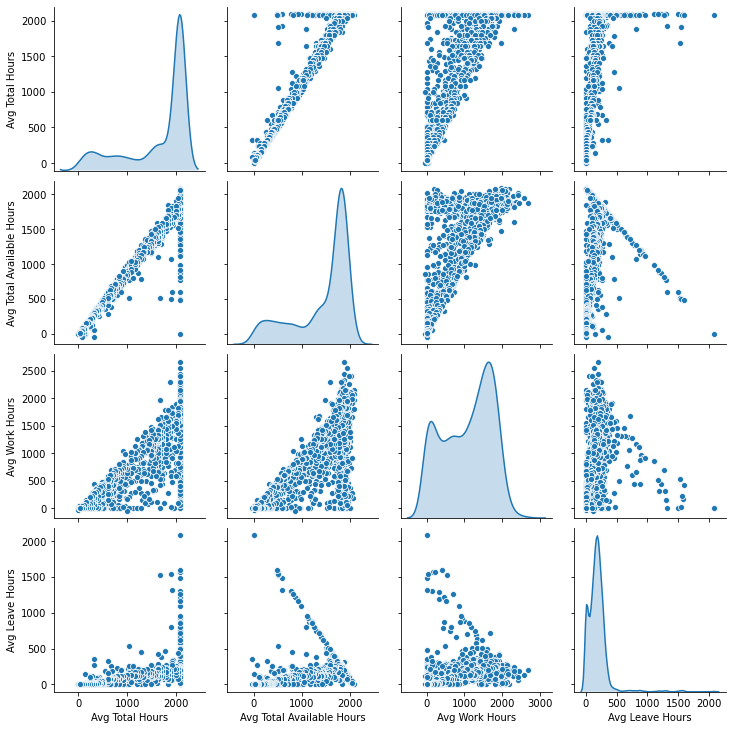

In [32]:
sns.pairplot(df_numeric_features.iloc[:,1:5],diag_kind="kde")

# This is the pairplots for 1st 5 variables and diag_kind is kde (kernel density estimates)

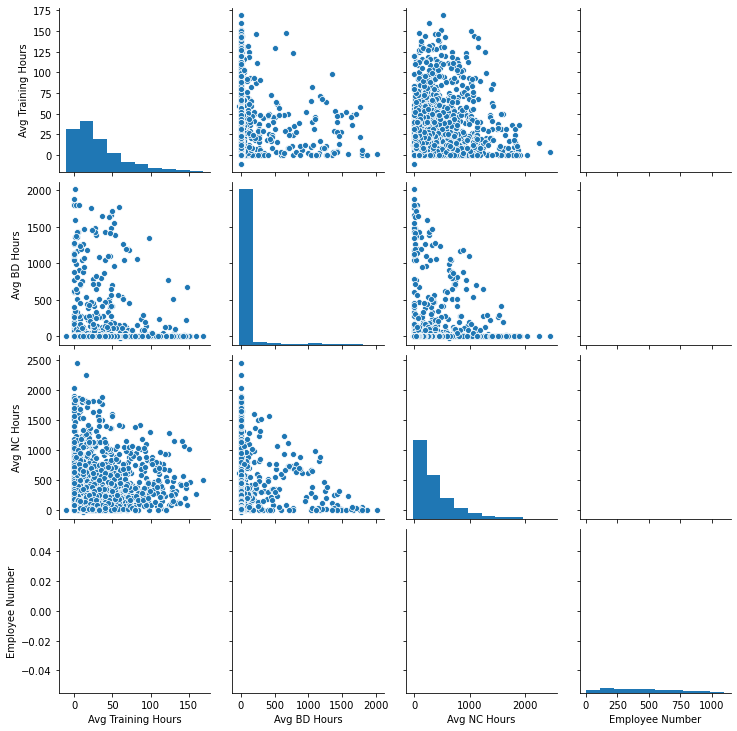

In [33]:
sns.pairplot(df_numeric_features.iloc[:,5:9],diag_kind="hist")

# all the diagnal elements have histogram.

In [34]:
df_categorical_features.shape

(2055, 206)

In [35]:
df_categorical_features.head()

,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Current Status,Termination Date,Total Hours-Apr-16,...,Work Hours-Mar-18,Leave Hours-Mar-18,Training Hours-Mar-18,BD Hours-Mar-18,NC Hours-Mar-18,Utilization%-Mar-18,Gender,Leaving Reason,Previous Employer,Emp Ref.
0,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,Active,-,168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,Active,-,168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,Active,-,168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,Active,-,168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,Active,-,168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


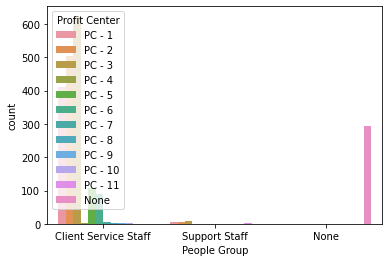

In [36]:
sns.countplot(x='People Group',hue='Profit Center',data=alldata);
plt.show()

# Approximetly 650 employees have clent group and they are falls in profit center 3.
# 300 employees dont have any group.

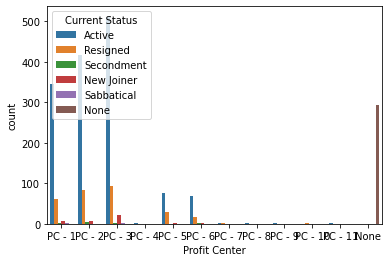

In [37]:
sns.countplot(x='Profit Center',hue='Current Status',data=alldata);
plt.show()

# In case of profit center 1 and 2 active employees are very high.
# profit center 6,7,8,9 there are no employees active.

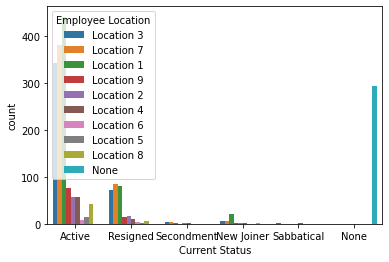

In [38]:
sns.countplot(x='Current Status',hue='Employee Location',data=alldata);
plt.show()

# Location 3,7 and 1 almost 400 employees are active and 100 employees resigned.

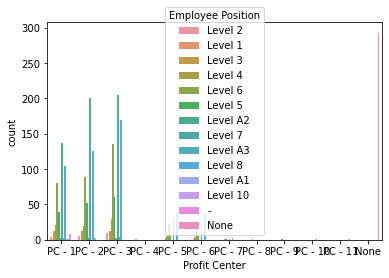

In [39]:
sns.countplot(x='Profit Center',hue='Employee Position',data=alldata);
plt.show()

# large no. of employees which do not have any position.
# profit center 1 there are 200 employees which falls in level 8 and 90 employees which falls in level 5


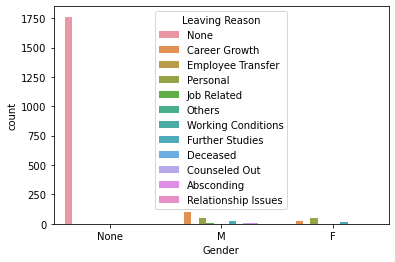

In [40]:
sns.countplot(x='Gender',hue='Leaving Reason',data=alldata);
plt.show()

# There are 1750 employees which dont give leaving reason.
# 100 males leaving company because of career growth. And approximetly 50 females giving job related reasons.

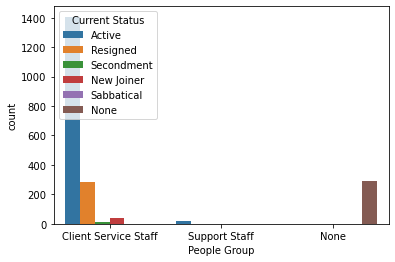

In [41]:
sns.countplot(x='People Group',hue='Current Status',data=alldata);
plt.show()

# In Client group 1400 employees are active and 240 employees resigned.
# In Service Staff 30 employees are New Joiner
# There are approximetly 250 employees which do not follow any group.

# Splitting Target Variable

In [42]:
predictor = alldata.iloc[:, alldata.columns !='Current Status']  # all input
target = alldata.iloc[:, alldata.columns=='Current Status']   # target

# here we are segregating the input variables and target variables and we are putting all the input variables under the 
# predictor. And we are putting the dependent variable under the label target.

# Splitting dataset into train and test

In [43]:
# Let us now split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

# here we are going to use 70 and 30 ratio. So we have 70 observation in train data and 30 obs. in the test data.
# In the output we are seeing the dimension of the input and output variable for both training and testing.

x_train (1438, 218)
x_test (617, 218)
y_train (1438, 1)
y_test (617, 1)


# Decision tree classifier

In [44]:
# Create decision tree classfier object using gini index
clf_DT = DecisionTreeClassifier(criterion='gini', random_state=0)

# we are creating a decision tree which is are first classifiere over here and we are using the gini index. 
# and random_state=0  

In [46]:
# Train model
model_DT = clf_DT.fit(x_train,y_train)  # we are applying the decision tree on the training dataset.

ValueError: could not convert string to float: 'PC - 3'